### Importing Initial Libraries

In [114]:
import numpy as np
import pandas as pd

### Reading CSV Files

In [116]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

### Viewing 'movies' Head

In [118]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


### Viewing 'credits' Head

In [120]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Merging 'movies' with 'credits' based on the title column

In [122]:
movies = movies.merge(credits, on='title')

### Viewing Merged Dataset ('movies')'s Head

In [124]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Checking 'movies' Info

In [126]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

### Checking 'original language' value counts

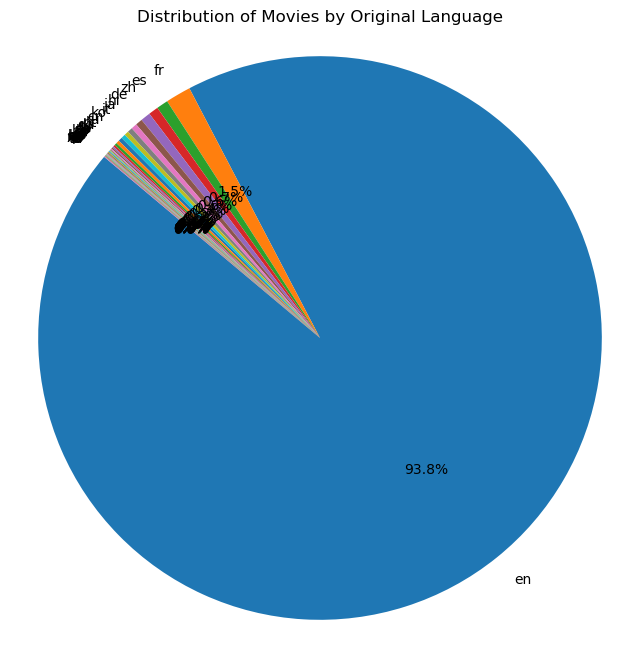

In [128]:
import matplotlib.pyplot as plt

# Count the occurrences of each language
language_counts = movies['original_language'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies by Original Language')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

### ✤ Conclusion: 
Almost 94% of the movies are in English Language so the data is extremly skewed with respect to language. So we will not consider the feature.

#### ✦ Deciding which columns are useful and which are not based on domain understanding 
𝟏. 𝐠𝐞𝐧𝐫𝐞𝐬:
<br>
𝟐. 𝐢𝐝:
<br>
𝟑. 𝐤𝐞𝐲𝐰𝐨𝐫𝐝𝐬:
<br>
𝟒. 𝐭𝐢𝐭𝐥𝐞:
<br>
𝟓. 𝐨𝐯𝐞𝐫𝐯𝐢𝐞𝐰:
<br>
𝟔. 𝐜𝐚𝐬𝐭:
<br>
𝟕. 𝐜𝐫𝐞𝐰:

In [131]:
movies = movies[['id','title','genres','keywords','overview','cast','crew']]

In [132]:
movies.head(1)

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


# ★ Pre Processing

In [134]:
movies.isnull().sum()

id          0
title       0
genres      0
keywords    0
overview    3
cast        0
crew        0
dtype: int64

In [135]:
movies.dropna(inplace=True)

movies.isnull().sum()

id          0
title       0
genres      0
keywords    0
overview    0
cast        0
crew        0
dtype: int64

In [136]:
movies.duplicated().sum()

0

### ✤ T͟h͟o͟u͟g͟h͟t͟ P͟r͟o͟c͟e͟s͟s͟:
1. We will create a collection of strings (we'll call it '𝐭𝐚𝐠𝐬') for each movie out of the 'genres', 'keywords', 'overview', 'cast', and 'crew'
2. Except 'overview', all other columns are a list of dictionary. Since it is not easy to work with this format, we will first convert them in a list of strings that are necessary to create 'tags'
3. For this, we will create a helper function 𝐜𝐨𝐧𝐯𝐞𝐫𝐭() that will serve the purpose

##### Let's create the convert() function first

In [139]:
import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

##### Converting 'genres'

In [141]:
movies['genres'].iloc[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [142]:
movies['genres'] = movies['genres'].apply(convert)

movies['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

##### Converting 'keywords'

In [144]:
movies['keywords'] = movies['keywords'].apply(convert)

movies['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4806, dtype: object

##### Converting 'cast':
From the 'cast' data, we will extract only the original names of the first three cast. Later casts are not that much important for recommendation.

##### Let's create convert_cast() function

In [147]:
def convert_cast(obj):
    L = []
    count = 0
    for i in ast.literal_eval(obj):
        if count !=3:
            L.append(i['name'])
            count+=1
        else:
            break
    return L

In [148]:
movies['cast'] = movies['cast'].apply(convert_cast)

movies['cast']

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

##### Converting 'crew':
From the 'crew' data, we will extract only the director's names.

##### Let's create convert_crew() function

In [151]:
def convert_crew(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name']) 
            break
    return L

In [152]:
movies['crew'] = movies['crew'].apply(convert_crew)

movies['crew']

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4804     [Robert Rodriguez]
4805         [Edward Burns]
4806          [Scott Smith]
4807          [Daniel Hsia]
4808     [Brian Herzlinger]
Name: crew, Length: 4806, dtype: object

##### Convert 'overview'
We will convert the paragraph of 'overview' into a list of strings

In [154]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [155]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.head(1)

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


##### Replacing space between two words with an underscore(_)
This is necessary otherwise each word of the string will be treated as individual string and our model will confused between Sam Worthington and Sam Mendes!

In [157]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","_") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","_") for i in x])
movies['overview'] = movies['overview'].apply(lambda x:[i.replace(" ","_") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","_") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","_") for i in x])

In [158]:
movies.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science_Fiction]","[culture_clash, future, space_war, space_colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam_Worthington, Zoe_Saldana, Sigourney_Weaver]",[James_Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug_abuse, exotic_island, east_india_...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny_Depp, Orlando_Bloom, Keira_Knightley]",[Gore_Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based_on_novel, secret_agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel_Craig, Christoph_Waltz, Léa_Seydoux]",[Sam_Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc_comics, crime_fighter, terrorist, secret_i...","[Following, the, death, of, District, Attorney...","[Christian_Bale, Michael_Caine, Gary_Oldman]",[Christopher_Nolan]
4,49529,John Carter,"[Action, Adventure, Science_Fiction]","[based_on_novel, mars, medallion, space_travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor_Kitsch, Lynn_Collins, Samantha_Morton]",[Andrew_Stanton]


##### Generating Tags
We will create 'tags' for each movie by concatenating all the strings in each column except id and title

In [160]:
movies['tags'] = movies['genres'] + movies['keywords'] + movies['overview'] + movies['cast'] + movies['crew']

movies.head()

,id,title,genres,keywords,overview,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, Science_Fiction]","[culture_clash, future, space_war, space_colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam_Worthington, Zoe_Saldana, Sigourney_Weaver]",[James_Cameron],"[Action, Adventure, Fantasy, Science_Fiction, ..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug_abuse, exotic_island, east_india_...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny_Depp, Orlando_Bloom, Keira_Knightley]",[Gore_Verbinski],"[Adventure, Fantasy, Action, ocean, drug_abuse..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based_on_novel, secret_agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel_Craig, Christoph_Waltz, Léa_Seydoux]",[Sam_Mendes],"[Action, Adventure, Crime, spy, based_on_novel..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc_comics, crime_fighter, terrorist, secret_i...","[Following, the, death, of, District, Attorney...","[Christian_Bale, Michael_Caine, Gary_Oldman]",[Christopher_Nolan],"[Action, Crime, Drama, Thriller, dc_comics, cr..."
4,49529,John Carter,"[Action, Adventure, Science_Fiction]","[based_on_novel, mars, medallion, space_travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor_Kitsch, Lynn_Collins, Samantha_Morton]",[Andrew_Stanton],"[Action, Adventure, Science_Fiction, based_on_..."


#####  ✦ Now we can remove other columns except id, title, and tags and convert the list of strings in tags into a long string with all lowercase letters

In [162]:
# Converting tags into a long string
movies['tags'] = movies['tags'].apply(lambda x:" ".join(x))

# Converting all letters into lowercase
movies['tags'] = movies['tags'].apply(lambda x:x.lower())

# Keeping only id, title, and tags and create a new dataframe
df = movies[['id','title','tags']]

In [163]:
df.head()

,id,title,tags
0,19995,Avatar,action adventure fantasy science_fiction cultu...
1,285,Pirates of the Caribbean: At World's End,adventure fantasy action ocean drug_abuse exot...
2,206647,Spectre,action adventure crime spy based_on_novel secr...
3,49026,The Dark Knight Rises,action crime drama thriller dc_comics crime_fi...
4,49529,John Carter,action adventure science_fiction based_on_nove...


#### ✤ Now we apply stemming to the words of the tags
'Stemming' refers to the process of reducing words to their root or base form by removing suffixes. For instance, stemming would reduce 'running', 'runs', and 'ran' to the stem 'run'. The primary goal of stemming is to improve the efficiency and effectiveness of text analysis tasks by treating different variations of a word as the same entity.

In [165]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [166]:
def stem_tags(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)    

In [206]:
df = df.copy()  # Avoid Setting_With_Copy Warning
df['tags'] = df['tags'].apply(stem_tags)

In [210]:
# Checking whether it is working or not
df['tags'][0]

'action adventur fantasi science_fict culture_clash futur space_war space_coloni societi space_travel futurist romanc space alien tribe alien_planet cgi marin soldier battl love_affair anti_war power_rel mind_and_soul 3d in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. sam_worthington zoe_saldana sigourney_weav james_cameron'

#### -------------------------------OUR PRE PROCESSING IS DONE------------------------------
<br>

# ★ Model Building

#### ✤ V͟e͟c͟t͟o͟r͟i͟z͟e͟ t͟a͟g͟s͟ u͟s͟i͟n͟g͟ B͟o͟W͟ :
Text vectorization is the process of converting text into numerical representations so that machine learning models can understand and process it. Here are several different ways to vectorize text like:
<br>
𝟏. 𝐁𝐚𝐠 𝐨𝐟 𝐖𝐨𝐫𝐝𝐬 (𝐁𝐨𝐖): Counts how many times each word appears in the text.
<br>
𝟐. 𝐖𝐨𝐫𝐝𝟐𝐕𝐞𝐜: Convert words into dense vectors that capture semantic meaning. 
<br>
𝟑.𝐓𝐅-𝐈𝐃𝐅 (𝐓𝐞𝐫𝐦 𝐅𝐫𝐞𝐪𝐮𝐞𝐧𝐜𝐲-𝐈𝐧𝐯𝐞𝐫𝐬𝐞 𝐃𝐨𝐜𝐮𝐦𝐞𝐧𝐭 𝐅𝐫𝐞𝐪𝐮𝐞𝐧𝐜𝐲): Weighs the frequency of a word by how rare it is across documents.



In [243]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [ ]:
vectors = cv.fit_transform(df['tags']).toarray()

vectors

###### ➤  Since the tag of a movie consists much less words than 5000, we are getting so many 0's in vectors

#### ✤ Finding Cosine Similarity Between Vectors
Distance is a measure of similarity. The more the distance between two vectors, the less will be the similarity between those two movies. 
<br>
Now, instead of Eucleadian distance, we will use cosine distance because the large dimension (5000). Eucleadian distance does not work well for large dimension. It is called the '𝐜𝐮𝐫𝐬𝐞 𝐨𝐟 𝐝𝐢𝐦𝐞𝐧𝐬𝐢𝐨𝐧𝐚𝐥𝐢𝐭𝐲'

In [308]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

###### ➤ Note that cosine_similarity is the reciprocal of the cosine_distance and its value ranges between 0 and 1

#### Recommending top 5 movies with respect to any movies

In [314]:
def recommend(movie):
    movie_index = df[df['title'] == movie].index[0]
    similarity_index = similarity[movie_index]
    five_recommended_movies_list = sorted(list(enumerate(similarity_index)), reverse=True, key=lambda x:x[1])[1:6]

    for i in five_recommended_movies_list:
        print(df.iloc[i[0]].title)

In [316]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [ ]:
import pickle

pickle.dump(df.to_dict(),open('movie_dict.pkl','wb'))

pickle.dump(similarity,open('similarity.pkl','wb'))